
🔹 Confusion Matrix:
[[70  1]
 [ 2 41]]

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

🔹 ROC-AUC Score: 0.99737962659679


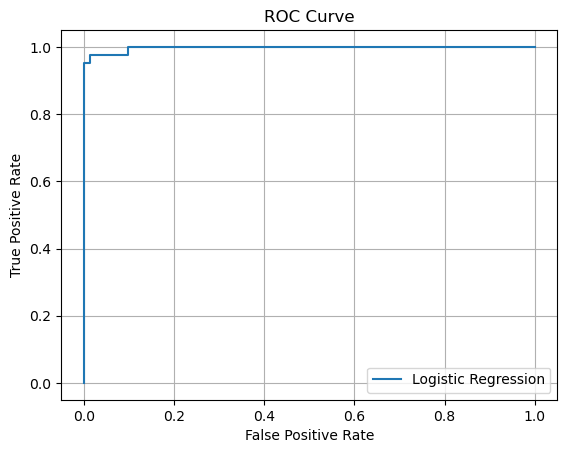

In [4]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Loading your dataset
file_path = r"D:\Elevate Labs Internship\Dataset Task 04 Elevate Labs.csv"
data = pd.read_csv(file_path)

# Droping unwanted columns
data = data.drop(['id', 'Unnamed: 32'], axis=1)

# Converting 'diagnosis' column to binary
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Spliting features (X) and target (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Training test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation
print("\n🔹 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))

print("🔹 ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()
